In [6]:
from numpy import *
import matplotlib.pyplot as plt

In [4]:
# Range of time (unit: year)
t = arange(0, 650, 1)
time = arange(2000, 2000 + len(t))
# Range of age (unit: year)
age = arange(1, 1001)
# Concentration of CO2
X_at = [1715 * exp(0.0305 * ti) / (1715 + exp(0.0305 * ti) - 1) + 284 for ti in t]
# Global annual mean temperature
sigma = 4.5
Ts = [15 + (sigma / log(2)) * log(Xa / 285)
      for Xa in X_at]

############# Input #############
x = 0.65
Gamma_Ts = [42.7 + 1.68 * (T - 25) + 0.012 * (T - 25) ** 2 for T in Ts]
Beta_X_Ts = [(3 * x * Xa * Gamma) / ((x * Xa - Gamma) * (x * Xa + 2 * Gamma)) for Xa, Gamma in zip(X_at, Gamma_Ts)]
s0 = 300 # Input at initial time
# Input
S1 = [s0 * (1 + 2.14 * Beta * log(Xa / 285)) for Beta, Xa in zip(Beta_X_Ts, X_at)]
# Temperature scale
Var = [2 ** (0.1 * new - 1.5) for new in Ts]

In [2]:
LinearModel_3d = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_LM_3d_mean.npy')
LinearModel_3d_1 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_LM_3d_mean_1.npy')
LinearModel_3d_2 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_LM_3d_mean_2.npy')
LinearModel_3d_3 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_LM_3d_mean_3.npy')

rMM_3d = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_rMM_3d_mean.npy')
rMM_3d_l = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_rMM_3d_l_mean.npy')
rMM_3d_s = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_rMM_3d_s_mean.npy')
rMM_3d_b = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_rMM_3d_b_mean.npy')

MM_3d = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_MM_3d_mean.npy')
MM_3d_l = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_MM_3d_l_mean.npy')
MM_3d_s = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_MM_3d_s_mean.npy')
MM_3d_b = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/20231229/arr_MM_3d_b_mean.npy')


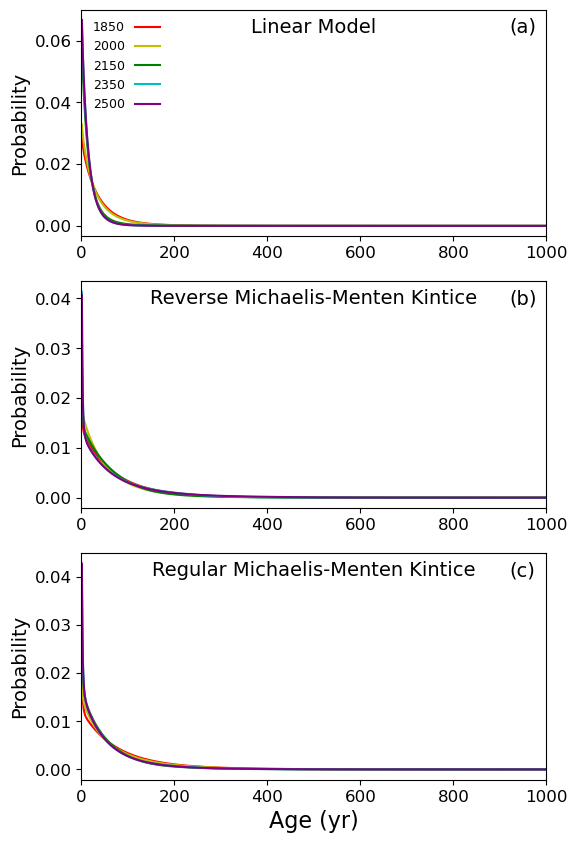

In [8]:
fig = plt.figure(figsize=(6, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(age, LinearModel_3d.T[:, 0], color='r', label='1850')
ax1.plot(age, LinearModel_3d.T[:, 149], color='y', label='2000')
ax1.plot(age, LinearModel_3d.T[:, 299], color='g', label='2150')
ax1.plot(age, LinearModel_3d.T[:, 449], color='c', label='2350')
ax1.plot(age, LinearModel_3d.T[:, 649], color='purple', label='2500')
ax1.set_xlim([0, 1000])
ax1.tick_params(labelsize=12)
ax1.set_ylabel('Probability', fontsize=14)
ax1.legend(loc=2, frameon=False, markerfirst=False, fontsize=9)
ax1.text(0.5, 0.9,'Linear Model', fontsize=14, transform=ax1.transAxes, ha='center')
ax1.text(0.92,0.9, '(a)', fontsize=14,transform=ax1.transAxes)

ax2.plot(age, rMM_3d.T[:, 0], color='r', label='2000')
ax2.plot(age, rMM_3d.T[:, 149], color='y', label='2150')
ax2.plot(age, rMM_3d.T[:, 299], color='g', label='2300')
ax2.plot(age, rMM_3d.T[:, 449], color='c', label='2450')
ax2.plot(age, rMM_3d.T[:, 649], color='purple', label='2650')
ax2.set_xlim([0, 1000])
ax2.tick_params(labelsize=12)
ax2.set_ylabel('Probability', fontsize=14)
ax2.text(0.5, 0.9,'Reverse Michaelis-Menten Kintice', fontsize=14, transform=ax2.transAxes, ha='center')
ax2.text(0.92,0.9, '(b)', fontsize=14,transform=ax2.transAxes)

ax3.plot(age, MM_3d.T[:, 0], color='r', label='2000')
ax3.plot(age, MM_3d.T[:, 149], color='y', label='2150')
ax3.plot(age, MM_3d.T[:, 299], color='g', label='2300')
ax3.plot(age, MM_3d.T[:, 449], color='c', label='2450')
ax3.plot(age, MM_3d.T[:, 649], color='purple', label='2650')
ax3.set_xlim([0, 1000])
ax3.tick_params(labelsize=12)
ax3.set_xlabel('Age (yr)', fontsize=16)
ax3.set_ylabel('Probability', fontsize=14)
ax3.text(0.5, 0.9,'Regular Michaelis-Menten Kintice', fontsize=14, transform=ax3.transAxes, ha='center')
ax3.text(0.92,0.9, '(c)', fontsize=14,transform=ax3.transAxes)


plt.savefig('Figure_S14.png', format='png', dpi=600, bbox_inches='tight')

